In [1]:
import os
import cv2
import sys
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from PIL import Image

# Import BMCNN
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)
from bmcnn import utils
import bmcnn.model as nmodel

#loading denoiser model
denoiser = nmodel.ImageDenoiser(graph = 'bmcnn', fs = 64, model_weights = os.path.abspath("model_ver2.0.h5"))


In [2]:
class Denoiser:
    def denoise_with_n(img_ref, sigma=8):
        img_ref = img_ref[...,::-1]
        h, w = img_ref.shape[:2]

        if w % 8 != 0:
            img_ref = cv2.resize(img_ref, (h, (w - w % 8)))
        if h % 8 != 0:
            img_ref = cv2.resize(img_ref, ((h - h % 8), w))

        img_n = utils.addNoise(img_ref, sigma)
        im_out = denoiser.run(img_n, sigma)
        na = np.array(im_out)
        img = np.uint8((na)*255)

        return img[...,::-1]

    def denoise_without_n(img_ref, sigma=8):
        img_ref = img_ref[...,::-1]
        h, w = img_ref.shape[:2]
        if w % 8 != 0:
            w = w - w % 8
            img_ref = cv2.resize(img_ref,(w, h))
        if h % 8 != 0:
            img_ref = cv2.resize(img_ref,(w, (h - h % 8)))

        im_out = denoiser.run(img_ref, sigma)
        na = np.array(im_out)
        img = np.uint8((na)*255)

        return img[..., ::-1]

In [17]:
# img = cv2.imread('../../data/splitted/good/good1\\a-rose-1039817_1280.jpg')
# img = cv2.imread('cameraman_out.png')

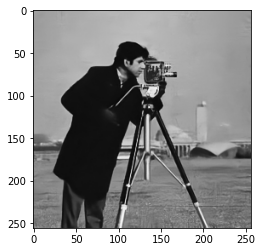

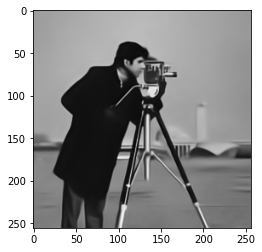

In [32]:
# plt.imshow(img[...,::-1])
# plt.show()

# img_1 = Denoiser.denoise_without_n(img, 23)

# plt.imshow(img_1[...,::-1])
# plt.show()

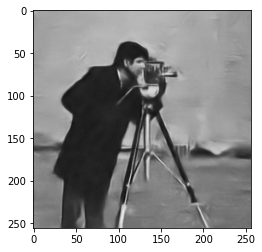

In [28]:
# img_1 = Denoiser.denoise_with_n(img, 50)
# plt.imshow(img_1[...,::-1])
# plt.show()